<a href="https://colab.research.google.com/github/juliusberner/nn_inverse_stability/blob/master/invers_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#network
b = 1. #initial translation
a = 1. #initial slope

#validation set
m = 1000 #size
u, v = -10., 10. #domain [u, v]

#loss and optimizer
batchsize = 10
lr = 1e-3
iterations = 500 #number of gradient descents
criterion = nn.MSELoss() #loss function

In [0]:
#network
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 2)
        self.fc1.weight.data=torch.tensor([[1.], [1.]])
        self.fc1.bias.data=torch.tensor([0., -b])
        self.fc2 = nn.Linear(2, 1)
        self.fc2.weight.data=torch.tensor([[a, -a]])
        self.fc2.bias.data=torch.tensor([0.])

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#optimization
def optimize(iterations, net):
  
    
    #validation set
    x_val = torch.linspace(u, v, m).view(-1,1)
    y_val = torch.zeros(m, 1)
    
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
    parameter = [net.parameters()]
    for i in range(iterations):  

            inputs = torch.FloatTensor(batchsize, 1).uniform_(u, v)
            labels = torch.zeros(batchsize, 1)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            loss = criterion(net(inputs), labels)
            loss.backward()
            optimizer.step()

            # print statistics
            if i % 30 == 29:    # print every 10 mini-batches
                loss = criterion(net(x_val), y_val)
                error = torch.max(abs(net(x_val) - y_val))
                print('iteration: %5d   loss: %.3f   max error: %.3f' %(i + 1, loss, error))
                parameter.append(net.parameters())

    print('Finished Training')
    return parameter

In [4]:
net=Net()
parameter=optimize(iterations, net)

iteration:    30   loss: 0.078   max error: 0.746
iteration:    60   loss: 0.046   max error: 0.577
iteration:    90   loss: 0.036   max error: 0.491
iteration:   120   loss: 0.029   max error: 0.431
iteration:   150   loss: 0.034   max error: 0.458
iteration:   180   loss: 0.019   max error: 0.343
iteration:   210   loss: 0.016   max error: 0.312
iteration:   240   loss: 0.014   max error: 0.271
iteration:   270   loss: 0.011   max error: 0.244
iteration:   300   loss: 0.009   max error: 0.228
iteration:   330   loss: 0.008   max error: 0.213
iteration:   360   loss: 0.006   max error: 0.200
iteration:   390   loss: 0.005   max error: 0.177
iteration:   420   loss: 0.004   max error: 0.154
iteration:   450   loss: 0.004   max error: 0.143
iteration:   480   loss: 0.003   max error: 0.132
Finished Training


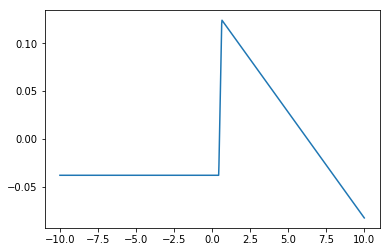

In [5]:
#plotting the predicted function

delta = 0 #increase interval by delta

x_plt = torch.linspace(u-delta, v+delta, m).view(-1,1)
with torch.no_grad():
    y_plt = net(x_plt)

plt.plot(x_plt.numpy(), y_plt.numpy())
plt.show()